In [35]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns
from uszipcode import SearchEngine


## VDH Dataset

In [36]:
vdh_foodPermits = pd.read_csv('VDH_FoodPermits.csv')

main_data = vdh_foodPermits 
main_data

,HealthDistrict,establishmentName,permitName,permitNumber,program,PermitType,status,RiskCategory,catering,commissary,...,inspectionFrequency,ApplicationDate,OriginalIssueDate,PermitIssueDate,ExpirationDate,FacilityAddress,city,zip,FIPSCode,LocalityName
0,EHD - Rappahannock,NaN,A-La-Carte by Weddings by Ginny,JCRS-5W9Q8L,Food Establishment,Restaurant/Caterer,Surrendered,1,NaN,NaN,...,NaN,2/12/2004,6/18/2004,6/18/2004,6/30/2005,NaN,NaN,NaN,NaN,NaN
1,EHD - Prince William,NaN,Chiyoshi,AJOS-ARKQPG,Food Establishment,Carry Out Food Service Only,Business Closed,3,NO,NO,...,NaN,9/22/2017,3/29/2018,4/1/2019,3/31/2022,NaN,NaN,NaN,NaN,NaN
2,EHD - Three Rivers,NaN,Monroe Bay Landing,JKAZ-59KLBD,Food Establishment,Restaurant,Surrendered,4,NaN,NaN,...,NaN,1/3/1994,2/10/1995,2/13/2003,2/28/2004,NaN,NaN,NaN,NaN,NaN
3,EHD - New River,NaN,Narrows High School-girls Basketball,ACOS-5NUP2H,Food Establishment,Temporary restaurant,Surrendered,NaN,NaN,NaN,...,NaN,6/25/2003,6/25/2003,7/4/2003,7/4/2003,NaN,NaN,NaN,NaN,NaN
4,EHD - Virginia Beach,NaN,No. One Chinese Restaurant,JLLD-5CLR4E,Food Establishment,Full Service Restaurant,Surrendered,4,NaN,NaN,...,NaN,7/1/2003,7/8/2003,7/1/2008,7/31/2009,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,EHD - Prince William,Wendy’s #6589,Wendy's #6589,#REF!,Food Establishment,NaN,Permitted,2,NO,NO,...,NaN,8/18/2021,10/6/2021,10/6/2021,10/31/2023,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8042,EHD - Prince William,Wendy’s #6589,Wendy's #139,JSUZ-55HQY2,Food Establishment,Fast Food Restaurant,Surrendered,2,NaN,NaN,...,6.0,9/10/2002,11/19/2002,12/1/2016,11/30/2017,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8043,EHD - Prince William,Wendy’s #6589,Wendy's #6589,AJOS-AMUM8G,Food Establishment,Fast Food Restaurant,Business Closed,NaN,NO,NO,...,NaN,5/17/2017,8/3/2017,6/1/2019,5/31/2021,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8044,EHD - Alleghany-Roanoke,3096 Colonial Avenue SW,Subway #63400 @ Virginia Western Community Col...,#REF!,Food Establishment,Fast Food Restaurant,Business Closed,1,NO,NO,...,6.0,7/25/2014,8/19/2014,9/1/2019,8/31/2020,3096 Colonial Avenue SW,Roanoke,24015,NaN,NaN


# Data Cleaning Part 1

In [37]:
main_data

,HealthDistrict,establishmentName,permitName,permitNumber,program,PermitType,status,RiskCategory,catering,commissary,...,inspectionFrequency,ApplicationDate,OriginalIssueDate,PermitIssueDate,ExpirationDate,FacilityAddress,city,zip,FIPSCode,LocalityName
0,EHD - Rappahannock,NaN,A-La-Carte by Weddings by Ginny,JCRS-5W9Q8L,Food Establishment,Restaurant/Caterer,Surrendered,1,NaN,NaN,...,NaN,2/12/2004,6/18/2004,6/18/2004,6/30/2005,NaN,NaN,NaN,NaN,NaN
1,EHD - Prince William,NaN,Chiyoshi,AJOS-ARKQPG,Food Establishment,Carry Out Food Service Only,Business Closed,3,NO,NO,...,NaN,9/22/2017,3/29/2018,4/1/2019,3/31/2022,NaN,NaN,NaN,NaN,NaN
2,EHD - Three Rivers,NaN,Monroe Bay Landing,JKAZ-59KLBD,Food Establishment,Restaurant,Surrendered,4,NaN,NaN,...,NaN,1/3/1994,2/10/1995,2/13/2003,2/28/2004,NaN,NaN,NaN,NaN,NaN
3,EHD - New River,NaN,Narrows High School-girls Basketball,ACOS-5NUP2H,Food Establishment,Temporary restaurant,Surrendered,NaN,NaN,NaN,...,NaN,6/25/2003,6/25/2003,7/4/2003,7/4/2003,NaN,NaN,NaN,NaN,NaN
4,EHD - Virginia Beach,NaN,No. One Chinese Restaurant,JLLD-5CLR4E,Food Establishment,Full Service Restaurant,Surrendered,4,NaN,NaN,...,NaN,7/1/2003,7/8/2003,7/1/2008,7/31/2009,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,EHD - Prince William,Wendy’s #6589,Wendy's #6589,#REF!,Food Establishment,NaN,Permitted,2,NO,NO,...,NaN,8/18/2021,10/6/2021,10/6/2021,10/31/2023,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8042,EHD - Prince William,Wendy’s #6589,Wendy's #139,JSUZ-55HQY2,Food Establishment,Fast Food Restaurant,Surrendered,2,NaN,NaN,...,6.0,9/10/2002,11/19/2002,12/1/2016,11/30/2017,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8043,EHD - Prince William,Wendy’s #6589,Wendy's #6589,AJOS-AMUM8G,Food Establishment,Fast Food Restaurant,Business Closed,NaN,NO,NO,...,NaN,5/17/2017,8/3/2017,6/1/2019,5/31/2021,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8044,EHD - Alleghany-Roanoke,3096 Colonial Avenue SW,Subway #63400 @ Virginia Western Community Col...,#REF!,Food Establishment,Fast Food Restaurant,Business Closed,1,NO,NO,...,6.0,7/25/2014,8/19/2014,9/1/2019,8/31/2020,3096 Colonial Avenue SW,Roanoke,24015,NaN,NaN


In [38]:
# Removing columns with all NaN values 
main_data  =  main_data.dropna(subset = ['city'])
main_data  =  main_data.dropna(subset = ['zip'])
main_data  =  main_data.drop(columns=['FIPSCode' , 'LocalityName' ])
# main_data  =  main_data.drop(columns=['LocalityName'])
main_data

,HealthDistrict,establishmentName,permitName,permitNumber,program,PermitType,status,RiskCategory,catering,commissary,smokingStatus,wasteWaterGrease,inspectionFrequency,ApplicationDate,OriginalIssueDate,PermitIssueDate,ExpirationDate,FacilityAddress,city,zip
111,EHD - Richmond,Vanquish Restaurant & Ultra Lounge,Vanquish Restaurant & Ultra Lounge,AGML-9EKKND,Food Establishment,Full Service Restaurant,Surrendered,4,NaN,NaN,Smoke Free,Grease Trap (Interior),NaN,12/19/2013,1/14/2014,1/14/2014,12/31/2014,1005 East Main Street,Richmond,23219
112,EHD - Richmond,Bliss,Bliss,HMES-8W6HFC,Food Establishment,Full Service Restaurant,Surrendered,3,NaN,NaN,Restricted,Grease Trap (Interior),NaN,7/10/2012,7/3/2012,7/3/2012,9/30/2013,1005 East Main Street,Richmond,23219
113,EHD - Richmond,Palazzio’s Restaurant,Palazzio's Restaurant,HMES-A2KQDY,Food Establishment,Full Service Restaurant,Surrendered,2,NaN,NaN,Smoke Free,Grease Trap (Interior),6.0,9/16/2015,9/25/2015,10/1/2015,9/30/2016,1005 East Main Street,Richmond,23219
114,EHD - Richmond,Vanquish Restaurant & Ultra Lounge,Vanquish Restaurant & Ultra Lounge,HMES-9GRT7X,Food Establishment,Full Service Restaurant,Surrendered,3,NaN,NaN,Restricted,Grease Trap (Interior),4.0,2/28/2014,1/14/2014,4/1/2015,3/31/2016,1005 East Main Street,Richmond,23219
115,EHD - Richmond,The Hash Pot,The Hash Pot,HMES-9NNKSU,Food Establishment,Mobile Food Unit,Surrendered,2,NaN,NaN,Exempt,None,6.0,9/5/2014,9/15/2014,9/15/2014,9/30/2015,1005 East Main Street,Richmond,23219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,EHD - Prince William,Wendy’s #6589,Wendy's #6589,#REF!,Food Establishment,NaN,Permitted,2,NO,NO,Smoke Free,Grease Trap (Exterior),NaN,8/18/2021,10/6/2021,10/6/2021,10/31/2023,2410 Prince William Pkwy,Woodbridge,22192
8042,EHD - Prince William,Wendy’s #6589,Wendy's #139,JSUZ-55HQY2,Food Establishment,Fast Food Restaurant,Surrendered,2,NaN,NaN,Smoke Free,Grease Trap (Exterior),6.0,9/10/2002,11/19/2002,12/1/2016,11/30/2017,2410 Prince William Pkwy,Woodbridge,22192
8043,EHD - Prince William,Wendy’s #6589,Wendy's #6589,AJOS-AMUM8G,Food Establishment,Fast Food Restaurant,Business Closed,NaN,NO,NO,Smoke Free,Other,NaN,5/17/2017,8/3/2017,6/1/2019,5/31/2021,2410 Prince William Pkwy,Woodbridge,22192
8044,EHD - Alleghany-Roanoke,3096 Colonial Avenue SW,Subway #63400 @ Virginia Western Community Col...,#REF!,Food Establishment,Fast Food Restaurant,Business Closed,1,NO,NO,Smoke Free,Grease Trap (Interior),6.0,7/25/2014,8/19/2014,9/1/2019,8/31/2020,3096 Colonial Avenue SW,Roanoke,24015


### Assigning County based on zipcode 

In [39]:

search = SearchEngine()

In [40]:
def get_county(zipcode):
    zipcode = search.by_zipcode(zipcode)
    if zipcode is not None:
        return zipcode.county
    else:
        return None

In [41]:
# used zipcode to find the county 
main_data['County'] = main_data['zip'].apply(get_county)
main_data

,HealthDistrict,establishmentName,permitName,permitNumber,program,PermitType,status,RiskCategory,catering,commissary,...,wasteWaterGrease,inspectionFrequency,ApplicationDate,OriginalIssueDate,PermitIssueDate,ExpirationDate,FacilityAddress,city,zip,County
111,EHD - Richmond,Vanquish Restaurant & Ultra Lounge,Vanquish Restaurant & Ultra Lounge,AGML-9EKKND,Food Establishment,Full Service Restaurant,Surrendered,4,NaN,NaN,...,Grease Trap (Interior),NaN,12/19/2013,1/14/2014,1/14/2014,12/31/2014,1005 East Main Street,Richmond,23219,Richmond city
112,EHD - Richmond,Bliss,Bliss,HMES-8W6HFC,Food Establishment,Full Service Restaurant,Surrendered,3,NaN,NaN,...,Grease Trap (Interior),NaN,7/10/2012,7/3/2012,7/3/2012,9/30/2013,1005 East Main Street,Richmond,23219,Richmond city
113,EHD - Richmond,Palazzio’s Restaurant,Palazzio's Restaurant,HMES-A2KQDY,Food Establishment,Full Service Restaurant,Surrendered,2,NaN,NaN,...,Grease Trap (Interior),6.0,9/16/2015,9/25/2015,10/1/2015,9/30/2016,1005 East Main Street,Richmond,23219,Richmond city
114,EHD - Richmond,Vanquish Restaurant & Ultra Lounge,Vanquish Restaurant & Ultra Lounge,HMES-9GRT7X,Food Establishment,Full Service Restaurant,Surrendered,3,NaN,NaN,...,Grease Trap (Interior),4.0,2/28/2014,1/14/2014,4/1/2015,3/31/2016,1005 East Main Street,Richmond,23219,Richmond city
115,EHD - Richmond,The Hash Pot,The Hash Pot,HMES-9NNKSU,Food Establishment,Mobile Food Unit,Surrendered,2,NaN,NaN,...,None,6.0,9/5/2014,9/15/2014,9/15/2014,9/30/2015,1005 East Main Street,Richmond,23219,Richmond city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,EHD - Prince William,Wendy’s #6589,Wendy's #6589,#REF!,Food Establishment,NaN,Permitted,2,NO,NO,...,Grease Trap (Exterior),NaN,8/18/2021,10/6/2021,10/6/2021,10/31/2023,2410 Prince William Pkwy,Woodbridge,22192,Prince William County
8042,EHD - Prince William,Wendy’s #6589,Wendy's #139,JSUZ-55HQY2,Food Establishment,Fast Food Restaurant,Surrendered,2,NaN,NaN,...,Grease Trap (Exterior),6.0,9/10/2002,11/19/2002,12/1/2016,11/30/2017,2410 Prince William Pkwy,Woodbridge,22192,Prince William County
8043,EHD - Prince William,Wendy’s #6589,Wendy's #6589,AJOS-AMUM8G,Food Establishment,Fast Food Restaurant,Business Closed,NaN,NO,NO,...,Other,NaN,5/17/2017,8/3/2017,6/1/2019,5/31/2021,2410 Prince William Pkwy,Woodbridge,22192,Prince William County
8044,EHD - Alleghany-Roanoke,3096 Colonial Avenue SW,Subway #63400 @ Virginia Western Community Col...,#REF!,Food Establishment,Fast Food Restaurant,Business Closed,1,NO,NO,...,Grease Trap (Interior),6.0,7/25/2014,8/19/2014,9/1/2019,8/31/2020,3096 Colonial Avenue SW,Roanoke,24015,Roanoke city


In [42]:
# Checking for Nan Values in each columns 
# Counting no. of Nan value in the entire dataset; We can filter this out in our data analysis part 
missing_num = main_data.isna().sum()
missing_num

HealthDistrict            0
establishmentName         1
permitName                0
permitNumber              0
program                   0
PermitType              242
status                    0
RiskCategory            207
catering               6014
commissary             6014
smokingStatus           890
wasteWaterGrease       3688
inspectionFrequency    4342
ApplicationDate           3
OriginalIssueDate       908
PermitIssueDate         893
ExpirationDate          770
FacilityAddress           0
city                      0
zip                       0
County                   35
dtype: int64

In [43]:
# copy of main_data  
merged_df = main_data

In [44]:
# dimension of our dataset prior to any  modifications
merged_df.shape

(7834, 21)

####  Data cleaning on PermitType

In [95]:
#Counting no of similar Permit Type 
main_data['PermitType'].value_counts()

Full Service Restaurant                       3141
Fast Food Restaurant                          1181
Mobile Food Unit                              1101
Carry Out Food Service Only                    489
Child Care Food Service                        272
Other Food Service                             228
Summer Food Service Program Feeding Site       164
Caterer                                        163
Convenience Store Food Service                 121
Adult Care Home Food Service                   110
Seasonal Fast Food Restaurant                  104
Commissary                                      86
Public Elementary School Food Service           70
Bed & Breakfast Food Service                    69
Seasonal Restaurant                             59
Public Middle or High School Food Service       41
Temporary Restaurant                            23
Grocery Store Food Service                      23
Private Elementary School Food Service          19
Hospital Food Service          

#### Putting the similar permit type in same catergory 

In [96]:
# Replace values of 'Full Service Restaurant' with 'Full Service Restaurant/Caterer'
merged_df['PermitType'] = merged_df['PermitType'].replace('Full Service Restaurant/Caterer','Full Service Restaurant' )
merged_df['PermitType'] = merged_df['PermitType'].replace('Restaurant','Full Service Restaurant' )
merged_df['PermitType'] = merged_df['PermitType'].replace('Restaurant/Caterer','Full Service Restaurant' )


# # Replace values of Mobile food unit with  Mobile Food Unit  

merged_df['PermitType'] = merged_df['PermitType'].replace('Mobile food unit', 'Mobile Food Unit') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Mobile Unit', 'Mobile Food Unit ') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Mobile Food Unit', 'Mobile Food Unit ')

# # Replace values of Carry out only   with Carry Out Food Service Only 

merged_df['PermitType'] = merged_df['PermitType'].replace('Carry out only' , 'Carry Out Food Service Only')
merged_df['PermitType'] = merged_df['PermitType'].replace('Carry Out Food Service Only ' , 'Carry Out Food Service Only')
merged_df['PermitType'] = merged_df['PermitType'].replace('Carry Out' , 'Carry Out Food Service Only')
merged_df['PermitType'] = merged_df['PermitType'].replace('Carry Out Only' , 'Carry Out Food Service Only')
merged_df['PermitType'] = merged_df['PermitType'].replace('Carry Out ' , 'Carry Out Food Service Only')

# # Replace values of Temporary restaurant  with Temporary Restaurant 
merged_df['PermitType'] = merged_df['PermitType'].replace('Temporary restaurant', 'Temporary Restaurant')

# # Replace values of Convenience Store Food Service  with Convenience Store  
merged_df['PermitType'] = merged_df['PermitType'].replace('Convenience Store' , 'Convenience Store Food Service')

# # Replace values of Child Care Center with Child Care Food Service
merged_df['PermitType'] = merged_df['PermitType'].replace('Child Care Center', 'Child Care Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Child care', 'Child Care Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Child Care', 'Child Care Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Child Care With Food ', 'Child Care Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Residential Child Care Institution Food Service', 'Child Care Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Child Care Kitchen', 'Child Care Food Service') 

# # Replace values of Summer Food Service Program Kitchen  with Summer Food Service Program Feeding Site 
merged_df['PermitType'] = merged_df['PermitType'].replace('Summer Food Service Program Kitchen', 'Summer Food Service Program Feeding Site')

# # Replace Nursing homes with Nursing Home Food Service
merged_df['PermitType'] = merged_df['PermitType'].replace('Nursing homes', 'Nursing Home Food Service')

# # Replace Seasonal Full Service Restaurant with Seasonal restaurant
merged_df['PermitType'] = merged_df['PermitType'].replace('Seasonal Full Service Restaurant' , 'Seasonal restaurant ')

# # Replace Seasonal restaurant  with Seasonal restaurant ( Gaps )  Seasonal Kitchen , Seasonal Restaurant
merged_df['PermitType'] = merged_df['PermitType'].replace('Seasonal restaurant ', 'Seasonal Restaurant') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Seasonal', 'Seasonal Restaurant') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Seasonal Kitchen', 'Seasonal Restaurant') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Seasonal restaurant', 'Seasonal Restaurant') 


# # # Replace Nursing homes with Adult Care Home Food Service  Adult Care/Hospital 
merged_df['PermitType'] = merged_df['PermitType'].replace('Adult Care Home', 'Adult Care Home Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Adult Home', 'Adult Care Home Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Adult day care', 'Adult Care Home Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Adult care homes', 'Adult Care Home Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Adult Day Care Food Service', 'Adult Care Home Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Adult Care/Hospital', 'Adult Care Home Food Service')
# Replace Group Home', 'Group Home Food Service'
merged_df['PermitType'] = merged_df['PermitType'].replace('Group Home', 'Group Home Food Service')

# Other Service 
merged_df['PermitType'] = merged_df['PermitType'].replace('Other food service', 'Other Food Service')

# Jail Kitchen 
merged_df['PermitType'] = merged_df['PermitType'].replace('Jail kitchen', 'Jail Food Service ')
merged_df['PermitType'] = merged_df['PermitType'].replace('Jail Food Service', 'Jail Food Service ')


# # Replace Seasonal restaurant  with Fast Food Restaurant 
merged_df['PermitType'] = merged_df['PermitType'].replace('Fast Food Restaurant/Caterer', 'Fast Food Restaurant ') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Fast Food', 'Fast Food Restaurant ') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Fast Food Restaurant', 'Fast Food Restaurant ') 

# Private school kitchen  with Private School Kitchen
merged_df['PermitType'] = merged_df['PermitType'].replace('Private school kitchen', 'Private School Kitchen') 



# Replace Seasonal restaurant  with Fast Food Restaurant 
merged_df['PermitType'] = merged_df['PermitType'].replace('Local Grocery Store Food Service', 'Grocery Store Food Service') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Local Grocery Store', 'Grocery Store Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Grocery store', 'Grocery Store Food Service')

# Convinience store   Convenience store , 
merged_df['PermitType'] = merged_df['PermitType'].replace('Convenience store', 'Convenience Store Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Local Convenience Store', 'Convenience Store Food Service')


# Private college food service
merged_df['PermitType'] = merged_df['PermitType'].replace('Private college food service', 'Private College Food Service')


#summer camp 
merged_df['PermitType'] = merged_df['PermitType'].replace('Summer camp kitchen', 'Summer Camp Food Service')




# # Bed and Brekfast food service 
merged_df['PermitType'] = merged_df['PermitType'].replace('Bed & Breakfast', 'Bed & Breakfast Food Service') 
merged_df['PermitType'] = merged_df['PermitType'].replace('Bed & Breakfast food service', 'Bed & Breakfast Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Continental Breakfast', 'Bed & Breakfast Food Service')
merged_df['PermitType'] = merged_df['PermitType'].replace('Hotel Continental Breakfast', 'Bed & Breakfast Food Service')

#Hospital Kitchcen 
merged_df['PermitType'] = merged_df['PermitType'].replace('Hospital kitchen', 'Hospital Food Service')


# Replace Seasonal restaurant  with Fast Food Restaurant 
merged_df['PermitType'] = merged_df['PermitType'].replace('Vending Machines', 'Vending Machine') 

In [97]:
# checking if we have any common permit type to be placed in the same category 
merged_df['PermitType'].value_counts()

Full Service Restaurant                       3141
Fast Food Restaurant                          1181
Mobile Food Unit                              1101
Carry Out Food Service Only                    489
Child Care Food Service                        272
Other Food Service                             228
Summer Food Service Program Feeding Site       164
Caterer                                        163
Convenience Store Food Service                 121
Adult Care Home Food Service                   110
Seasonal Fast Food Restaurant                  104
Commissary                                      86
Public Elementary School Food Service           70
Bed & Breakfast Food Service                    69
Seasonal Restaurant                             59
Public Middle or High School Food Service       41
Temporary Restaurant                            23
Grocery Store Food Service                      23
Private Elementary School Food Service          19
Hospital Food Service          

In [98]:
# merged_df['County'].unique()

#### Doing the same with County 

In [99]:
#Richmond 
merged_df['County'] = merged_df['County'].replace('Richmond city', 'Richmond County')
merged_df['County'] = merged_df['County'].replace('Richmond City', 'Richmond County')

#Ronake 
merged_df['County'] = merged_df['County'].replace('Roanoke city', 'Roanoke County')

# Falls chruch 
merged_df['County'] = merged_df['County'].replace('Falls Church city', 'Falls Church County')
merged_df['County'] = merged_df['County'].replace('Falls Church City', 'Falls Church County')

#
# James City County
merged_df['County'] = merged_df['County'].replace('James City', 'James City County')

merged_df['County'] = merged_df['County'].replace('Falls Church City', 'Falls Church County')

# #
# # Falls chruch 
merged_df['County'] = merged_df['County'].replace('Fredericksburg city', 'Fredericksburg County')
merged_df['County'] = merged_df['County'].replace('Fredericksburg City', 'Fredericksburg County')
merged_df['County'] = merged_df['County'].replace('Frederick County', 'Fredericksburg County')


In [100]:
merged_df['County'].unique()

array(['Richmond County', 'Bristol city', 'Prince William County',
       'Roanoke County', 'Spotsylvania County', 'Fairfax County',
       'Smyth County', 'Arlington County', 'Carroll County',
       'Washington County', 'Galax city', 'Henrico County',
       'Stafford County', 'James City County', 'Manassas city',
       'Radford city', 'Caroline County', 'District of Columbia',
       'Chesterfield County', 'King and Queen County',
       'Pittsylvania County', 'Fredericksburg County',
       'Williamsburg city', 'Wythe County', 'Falls Church County',
       'Hanover County', 'Bland County', 'Franklin city',
       'King George County', 'Dickenson County', 'New Kent County',
       'Grayson County', 'Chesapeake city', 'Danville city',
       'Tazewell County', None, 'Montgomery County', 'York County',
       "Prince George's County", 'Orange County', 'Jefferson County',
       'Howard County', 'Pulaski County', 'Sullivan County',
       'Alexandria city', 'Nelson County', 'Portsmout

In [101]:
missing_num = merged_df.isna().sum()
missing_num

HealthDistrict              133
establishmentName           134
permitName                  133
permitNumber                133
program                     133
PermitType                  375
status                      133
RiskCategory                340
catering                   6147
commissary                 6147
smokingStatus              1023
wasteWaterGrease           3821
inspectionFrequency        4475
ApplicationDate             136
OriginalIssueDate          1041
PermitIssueDate            1026
ExpirationDate              903
FacilityAddress             133
city                        133
zip                         133
County                       35
FIPS                       7834
Obesity Rate               7834
Median Household Income    7834
Percent Rural              7834
Food Environment Index     7839
Fast Food 2016             7834
Snap Benefits 2017         7885
Veg Farms 2012             7867
Farmers markets 2018       7834
Wic per capita             7901
dtype: i

In [102]:
# Drop rows with NaN values in column 'PermitType' and 'County'
merged_df = merged_df.dropna(subset=['PermitType'])
merged_df = merged_df.dropna(subset=['County'])

In [83]:
# As we can see there is no Nan values on the Permit type and County 
missing_num = merged_df.isna().sum()
missing_num

HealthDistrict            0
establishmentName         1
permitName                0
permitNumber              0
program                   0
PermitType                0
status                    0
RiskCategory            174
catering               5982
commissary             5982
smokingStatus           883
wasteWaterGrease       3663
inspectionFrequency    4246
ApplicationDate           3
OriginalIssueDate       800
PermitIssueDate         834
ExpirationDate          724
FacilityAddress           0
city                      0
zip                       0
County                    0
dtype: int64

### Analyzing no. of Permit Types based on Counties 

In [103]:
## Counting which County has the highest number of Permit Types and which has the lowest
# Based on the results, we can emphasize more food permits ( Grocery or Restaurants)
#on these location for locals to access healthy food options

# group the data by county and permit type, and count the number of unique permit types
county_permit_counts = merged_df.groupby(['County', 'PermitType']).size().reset_index(name='counts')

# group the data by county, sum the permit counts for each county, and sort the result in descending order
county_totals_high = county_permit_counts.groupby('County').sum().sort_values('counts', ascending=False)

# group the data by county, sum the permit counts for each county, and sort the result in descending order
county_totals_low = county_permit_counts.groupby('County').sum().sort_values('counts', ascending=True)


# print the county with the highest number of permit types
county_totals_high


,counts
County,
Richmond County,2052
Prince William County,1164
Fairfax County,617
Henrico County,488
Roanoke County,428
...,...
Norfolk city,1
New York County,1
Mercer County,1


In [104]:
county_totals_low

,counts
County,
Jefferson County,1
New York County,1
Norfolk city,1
Floyd County,1
Hawkins County,1
...,...
Roanoke County,428
Henrico County,488
Fairfax County,617


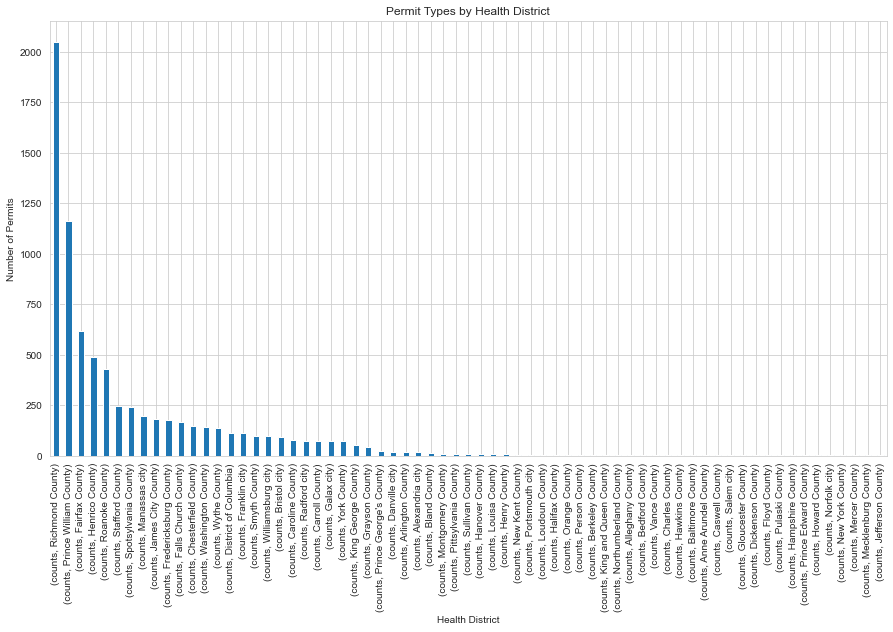

In [105]:
# Plot the results as a bar plot

import matplotlib.pyplot as plt
# sns.set_style('whitegrid') 
plt.figure(figsize=(15, 8))
ax = county_totals_high.unstack().plot(kind="bar", stacked=True)
ax.set_xlabel("Health District")
ax.set_ylabel("Number of Permits")
ax.set_title("Permit Types by Health District")
plt.show()

### Merging the main VDH dataset with Test_table ( Obesity and SNAP) 

In [106]:
# merged two datasets using County column
#merged_df = pd.merge(Test_table, main_data  , on = "County")
merged_df = pd.concat([main_data, Test_table], axis=0, join='outer', ignore_index=True, sort=False)

In [107]:
Test_table = pd.read_excel('TestTable1.xlsx')
Test_table

,County,FIPS,Obesity Rate,Median Household Income,Percent Rural,Food Environment Index,Fast Food 2016,Snap Benefits 2017,Veg Farms 2012,Farmers markets 2018,Wic per capita
0,Accomack,51001,40.0,44127,100.0,8.5,18,18.474421,23.0,3,16.252541
1,Albemarle,51003,27.7,79708,45.0,8.8,58,NaN,31.0,5,4.156080
2,Alleghany,51005,36.4,52281,52.4,7.2,10,NaN,3.0,0,NaN
3,Amelia,51007,35.2,70511,100.0,8.6,6,13.082438,3.0,1,NaN
4,Amherst,51009,36.1,61111,63.7,8.4,19,12.109366,6.0,1,10.961493
...,...,...,...,...,...,...,...,...,...,...,...
128,Suffolk City,51800,35.4,72264,21.6,9.0,63,15.020631,11.0,2,12.698185
129,Virginia Beach City,51810,30.7,73961,1.5,9.1,440,8.168770,15.0,5,8.826238
130,Waynesboro City,51820,35.4,53635,2.5,7.5,25,NaN,NaN,1,17.822309
131,Williamsburg City,51830,33.6,60655,0.0,7.9,27,NaN,NaN,1,NaN


## Continue from here ... 

### API and Mapping health district to county level ( previous analysis) .. 

In [ ]:
# Considering the first 300 rows
clean_vdh = vdh_foodPermits.loc[0:300, 'HealthDistrict': 'RiskCategory']

# Switch object type to factor
clean_vdh['HealthDistrict'] = clean_vdh['HealthDistrict'].astype('string')

# replace NaN values from Establishment Name into thier permit Name for analysis purpose
clean_vdh['establishmentName'] = clean_vdh['establishmentName'].astype('string')
clean_vdh['establishmentName'] = clean_vdh['establishmentName'].fillna(clean_vdh['permitName'])

# Removed EHD from Health Districts for easy access of location/Districts
clean_vdh.HealthDistrict = clean_vdh.HealthDistrict.map(lambda b: b.replace("EHD - ", ""))

# Remove columns that are insignificant
clean_vdh = clean_vdh.drop(columns=["permitNumber", "program", "status", "RiskCategory"])
clean_vdh

In [ ]:
# First step: Obtain an API key from the US Census Bureau's website
api_key = 'af7d72e7b5f0ccde2289b15f56500e899c752023'

In [ ]:
# Second step: Install the census and us Python packages

In [ ]:
# Third step: Import the necessary packages in this Python script
from census import Census
from us import states

In [ ]:
# Fourth step: Set up API key by creating an instance of the Census class and passing in API key as a parameter
c = Census(api_key)

In [ ]:
# Final steps: Obtain a list of the counties in Virginia from the Census Bureau API
# Use method to get a list of all available tables in the API
counties = c.acs5.state_county_tract("NAME", state_fips = states.VA.fips, county_fips = "*", tract="*")

In [ ]:
# The above will return a list of dictionaries, where each dictionary corresponds 
# to a county and contains the county's name and FIPS code.

# Federal Information Processing System
# FIPS code: FIPS codes are numbers which uniquely identify geographic areas.

In [ ]:
# Map the health districts to corresponding counties
# To do this, you can create a dictionary that maps the FIPS codes to their corresponding counties, and 
# then use this dictionary to match each health district to its corresponding county.

county_dict = {}
for county in counties:
    county_dict[county['county']] = county['NAME']

# This creates a dictionary where the keys are the county FIPS codes and the values are the county names.

In [ ]:
# Add a new column to your dataset that contains the county name for each health district. 

In [ ]:
# Create a new column to store the corresponding county for each health district


In [ ]:
# Create a new column that contains the county name for each restaurant permit
#clean_vdh['county'] = clean_vdh['health_district'].map(district_county_table)

In [ ]:
main_data 

In [ ]:
missing_num = main_data.isna().sum()
missing_num

### Cleaning second Dataset and Merging

In [ ]:
locality = pd.read_csv('Locality-to-HD-to-HPR.csv')
locality = locality.rename(columns={'Unnamed: 0': 'CityCounty', 'Unnamed: 1': 'CountyFIPS','Unnamed: 2': 'HealthDistrict'})
locality = locality.drop(columns=["Unnamed: 3"])
locality = locality.drop([0,1])
locality

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


merged = pd.merge(clean_vdh, locality, on="HealthDistrict")
merged = merged.drop_duplicates(subset=["establishmentName", "permitName"])
merged

In [ ]:
data = merged
print(data.HealthDistrict.unique())

In [ ]:
# Drop row 281 from the DataFrame # mentions to remoove the row in the datasets
data = data.drop(index=281)

### What approach can be used for this dataset ? 

In [ ]:
# Getting the number of missing values in each column
missing_num = data.isna().sum()
missing_num

In [ ]:
data['PermitType'].value_counts()

## Replace features with similar Category

In [ ]:
# Replace values of 'Full Service Restaurant' with 'Full Service Restaurant/Caterer'
data['PermitType'] = data['PermitType'].replace('Full Service Restaurant/Caterer','Full Service Restaurant' )
data['PermitType'] = data['PermitType'].replace('Restaurant','Full Service Restaurant' )
data['PermitType'] = data['PermitType'].replace('Restaurant/Caterer','Full Service Restaurant' )


# Replace values of Mobile food unit with  Mobile Food Unit  

data['PermitType'] = data['PermitType'].replace('Mobile food unit', 'Mobile Food Unit') 

# Replace values of Carry out only   with Carry Out Food Service Only 

data['PermitType'] = data['PermitType'].replace('Carry out only' , 'Carry Out Food Service Only ')

# Replace values of Temporary restaurant  with Temporary Restaurant 
data['PermitType'] = data['PermitType'].replace('Temporary restaurant', 'Temporary Restaurant')

# Replace values of Convenience Store Food Service  with Convenience Store  
data['PermitType'] = data['PermitType'].replace('Convenience Store' , 'Convenience Store Food Service')

# Replace values of Child Care Center with Child Care Food Service
data['PermitType'] = data['PermitType'].replace('Child Care Center', 'Child Care Food Service')

# Replace values of Summer Food Service Program Kitchen  with Summer Food Service Program Feeding Site 
data['PermitType'] = data['PermitType'].replace('Summer Food Service Program Kitchen', 'Summer Food Service Program Feeding Site')

# Replace Nursing homes with Nursing Home Food Service
data['PermitType'] = data['PermitType'].replace('Nursing homes', 'Nursing Home Food Service')

# Replace Seasonal Full Service Restaurant with Seasonal restaurant
data['PermitType'] = data['PermitType'].replace('Seasonal Full Service Restaurant' , 'Seasonal restaurant ')

# Replace Seasonal restaurant  with Seasonal restaurant ( Gaps )
data['PermitType'] = data['PermitType'].replace('Seasonal restaurant ', 'Seasonal restaurant') 


In [ ]:
data['PermitType'].value_counts()


In [ ]:
# Getting the number of missing values in each column
missing_num = data.isna().sum()
missing_num

In [ ]:
data 

In [ ]:
# Create a boolean mask for NaN values
nan_vals = data.isna().any(axis=1)

# Use the mask to index the DataFrame and print the NaN rows
nan_rows = data[nan_vals]




#### Dealing with missing values


In [ ]:
#  Assigning resturant type based on features 

data.at[96, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[201, 'PermitType'] = "State Institution Food Service "
data.at[271,'PermitType'] = "Mobile Food Unit"

data.at[301,'PermitType'] = "Mobile Food Unit"
data.at[391,'PermitType'] = "Cafe"
data.at[396,'PermitType'] = "Mobile Food Unit"
data.at[401, 'PermitType'] = "State Institution Food Service "
data.at[769, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[799, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[880, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[881, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[882, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[883, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[885, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[886, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[888, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[879, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[927, 'PermitType'] = "Caterer"
data.at[931, 'PermitType'] = "Fast Food Restaurant"
data.at[931, 'PermitType'] = "Carry Out Food Service Only "
data.at[888, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[887, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[951, 'PermitType'] = "Carry Out Food Service Only "
data.at[952, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[958, 'PermitType'] = "Full Service Restaurant/Caterer"
data.at[1003, 'PermitType'] = "Bar"
data.at[1041, 'PermitType'] = "Bakery"
data.at[1048, 'PermitType'] = "Bed & Breakfast Food Service"
data.at[998, 'PermitType'] = "Bed & Breakfast Food Service"


In [ ]:

# checking the NaN in the datasets
missing_num = data.isna().sum()
missing_num

In [ ]:
# Create a boolean mask for NaN values
nan_vals = data.isna().any(axis=1)

# Use the mask to index the DataFrame and print the NaN rows
nan_rows = data[nan_vals]
nan_rows 

In [ ]:
# removing the remaning na values since they don't belong to any food industry
# Removing State Fair Popcorn as well since it's online 

data = data.dropna()
data

In [ ]:
# checking if we have any NaN left 
missing_num = data.isna().sum()
missing_num

In [ ]:
data

In [ ]:

## Counting which Healthistrict has the highest number of Permit Types and which has the lowest
# Based on the results, we can emphasize more food permits ( Grocery or Restaurants)
#on these location for locals to access healthy food options

# group the data by county and permit type, and count the number of unique permit types
county_permit_counts = data.groupby(['HealthDistrict', 'PermitType']).size().reset_index(name='counts')

# group the data by county, sum the permit counts for each county, and sort the result in descending order
county_totals_high = county_permit_counts.groupby('HealthDistrict').sum().sort_values('counts', ascending=False)

# group the data by county, sum the permit counts for each county, and sort the result in descending order
county_totals_low = county_permit_counts.groupby('HealthDistrict').sum().sort_values('counts', ascending=True)


# print the county with the highest number of permit types
print(county_totals_high)

In [ ]:
# print the county with the lowest number of permit types
print(county_totals_low)

In [ ]:
# Plot the results as a bar plot

import matplotlib.pyplot as plt
sns.set_style('whitegrid') 
plt.figure(figsize=(15, 8))
ax = county_totals_high.unstack().plot(kind="bar", stacked=True)
ax.set_xlabel("Health District")
ax.set_ylabel("Number of Permits")
ax.set_title("Permit Types by Health District")
plt.show()

From, above bar plot  Richmond has the highest number of the Permit whereas Alexandria,
Piedmont, Crater, and                   
Cumberland Plateau  have the lowest number of Permit issued. 

### Obseity Rate 

In [ ]:
health_ranking_2022 = pd.read_excel("2022_Clean_County_Data.xlsx")
#droping the unwanted columns 
health_ranking_2022 = health_ranking_2022.iloc[:, :-2]
# removing unnecessary columns 
health_ranking_2022 = health_ranking_2022 .drop('FIPS', axis= 1) 
health_ranking_2022

## Checking the percentage of missing values

In [ ]:
#getting the sum of missing values from each column 
missing_val = health_ranking_2022.isna().sum()
missing_val

## Dealing with missing values

In [ ]:
# removing the rows with nan values since we don't want to make any pressumptions 
health_ranking_2022 = health_ranking_2022.dropna()
health_ranking_2022

In [ ]:
#checking if any NaN value exists 
missing_val = health_ranking_2022.isna().sum()
missing_val

## Data Analysis

## Visualizing datasets

In [ ]:

sns.set_palette('colorblind')
sns.pairplot(data=health_ranking_2022, height=3)

### Distribution of the target variable 

In [ ]:
# violin plot
sns.violinplot(x=health_ranking_2022['Obesity Rate'], inner="quartile", color="#36B37E");

We can see from the obesity fall between 33 to  38 . The dashed lines represents the three quartiles . 

####  Visualizing the datasets

In [ ]:
# Performed one-hot encoding on the 'County' ( categorical) variable
county_dummies = pd.get_dummies(health_ranking_2022['County'])

# Combine the one-hot encoded variables with the other independent variables
X = pd.concat([health_ranking_2022[['Median Household Income','Percent Rural']]], axis=1)

# Define the dependent variable
y = health_ranking_2022['Obesity Rate']

In [ ]:
## Pearson correlation coefficient matrix to check multicollinearity 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(health_ranking_2022.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

The above Correlation map shows a negative correlation of -0.72 between obesity and income. As income increases, obesity tends to decrease, and vice versa.
The correlation coefficient of 0.13 between obesity and living in a rural area suggests a weak positive correlation between these two variables.However, the correlation does not imply causation.


In [ ]:

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols


# # Fit the ANOVA model
# model = ols('Obsesity ~ C(County)', data=df).fit()

# # Print the ANOVA table
# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)


###  Splitting the datasets into training and testing datasets

In [ ]:
#splitting the dataset into 70:30 ratio
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shape of the training and testing sets
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)
# X_train shape: (700, n_features)
# y_train shape: (700,)
# X_test shape: (300, n_features)
# y_test shape: (300,)


### Regression model 

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Fit the model and print the results
model = linear_model.LinearRegression().fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


In [ ]:
y_pred_mlr= model.predict(X_test)
print(y_pred_mlr )

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid') 
# Assuming y_test and y_pred_mlr are the actual and predicted values
model_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlr})
sns.lmplot(x='Actual', y='Predicted', data=model_df, height=5, aspect=1.5, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred_mlr)
r2 = metrics.r2_score(y_test, y_pred_mlr)
absolute_error = metrics.mean_absolute_error(y_test, y_pred_mlr)
print("Mean squared error: " , mse)
print("R-squared: " , r2)
print("Mean Absolute Error: " , absolute_error)

### Sorting the datset based on high Obesity Rate 

### Can we show any realtion with the permit datset ??

In [ ]:
copy_health_ranking_2022  =  health_ranking_2022
copy_health_ranking_2022
sorted_df = copy_health_ranking_2022.sort_values(by = "Obesity Rate",ascending=False)
sorted_df.head(10)

### Obsesity vs income above 50000 

In [ ]:

# filter the column using boolean indexing
above_50000 = sorted_df[sorted_df['Median Household Income'] > 50000]

# print the filtered values
print(above_50000)


In [ ]:
col_medians_above = above_50000.median(axis=0)
col_medians_above

In [ ]:
### Obsesity vs income below 50000 

In [ ]:
# filter the column using boolean indexing
below_50000 = sorted_df[sorted_df['Median Household Income'] < 50000]

# print the filtered values
print(below_50000)


In [ ]:
col_medians_below = below_50000.median(axis=0)
col_medians_below